<a href="https://colab.research.google.com/github/partho1999/Image-Classification/blob/main/Multi_Label_Image_Classification_Model_in_Python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

source:https://www.analyticsvidhya.com/blog/2019/04/build-first-multi-label-image-classification-model-python/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# !unzip "/content/drive/MyDrive/Multi_Label_dataset.zip" -d "/content/drive/MyDrive"

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [4]:
train = pd.read_csv('/content/drive/MyDrive/Multi_Label_dataset/train.csv')    # reading the csv file
train.head()      # printing first five rows of the file

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [5]:
train.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [6]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('/content/drive/MyDrive/Multi_Label_dataset/Images/'+train['Id'][i]+'.jpg',target_size=(80,80,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 7254/7254 [35:10<00:00,  3.44it/s]


In [7]:
X.shape

(7254, 80, 80, 3)

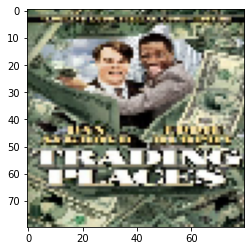

In [8]:
plt.imshow(X[2])

In [9]:
train['Genre'][2]

"['Comedy']"

In [10]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))
y.shape

(7254, 25)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [12]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(80,80,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 39, 39, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 18, 18, 32)        0

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10
91/91 [==============================] - 33s 350ms/step - loss: 0.3732 - accuracy: 0.1541 - val_loss: 0.3173 - val_accuracy: 0.1964
Epoch 2/10
91/91 [==============================] - 31s 345ms/step - loss: 0.2787 - accuracy: 0.2211 - val_loss: 0.2692 - val_accuracy: 0.1964
Epoch 3/10
91/91 [==============================] - 31s 345ms/step - loss: 0.2646 - accuracy: 0.2268 - val_loss: 0.2583 - val_accuracy: 0.1964
Epoch 4/10
91/91 [==============================] - 31s 345ms/step - loss: 0.2571 - accuracy: 0.2351 - val_loss: 0.2516 - val_accuracy: 0.2109
Epoch 5/10
91/91 [==============================] - 31s 342ms/step - loss: 0.2524 - accuracy: 0.2669 - val_loss: 0.2466 - val_accuracy: 0.1964
Epoch 6/10
91/91 [==============================] - 31s 343ms/step - loss: 0.2504 - accuracy: 0.2612 - val_loss: 0.2454 - val_accuracy: 0.1992
Epoch 7/10
91/91 [==============================] - 31s 340ms/step - loss: 0.2472 - accuracy: 0.2831 - val_loss: 0.2386 - val_accuracy: 0.2908

In [16]:
model.save('multi_level_model.h5')

test

In [17]:
import cv2
from keras.models import load_model
import numpy as np

model = model=load_model('multi_level_model.h5')

In [20]:
img = image.load_img('GOT.jpg',target_size=(80,80,3))
img = image.img_to_array(img)
img = img/255

Drama (0.527)
Thriller (0.305)
Action (0.286)


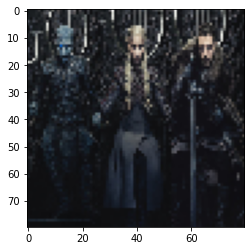

In [21]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,80,80,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [22]:
img = image.load_img('avengers.jpeg',target_size=(80,80,3))
img = image.img_to_array(img)
img = img/255

Drama (0.528)
Thriller (0.295)
Action (0.287)


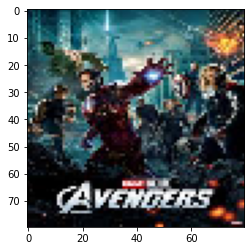

In [23]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,80,80,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

NOTE:I WRITE THIS CODE JUST FOR PRATICE PERPOUSE .I USED IMAGE SIZE (80,80,3) FOR LACK OF GPU AND RAM POWER.